In [1]:
#importing all required libraries for EDA and model building
import pandas as pd
import numpy as np

#importing libraies for data visulization

import matplotlib.pyplot as plt
import seaborn as sns

#importing libraies for model building and calculations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score.mean_squared_error,

In [2]:
#importing the dataset
df = pd.read_csv('day.csv')

In [23]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#lewts work on data preperation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#from the given dataset we can see that there are few categorical variables which is wathersit and season and year, so let us work on converting them to categorical string as recomended

season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'clear',2: 'mist_cloudy',3: 'light_snow_rain',4: 'heavy_rain_ice'}
df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#now let us work on checking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

since we do not have any null variables let's go ahead and perform the other EDA to find the relation between the variables and find the relaltoin between cnt and other variables



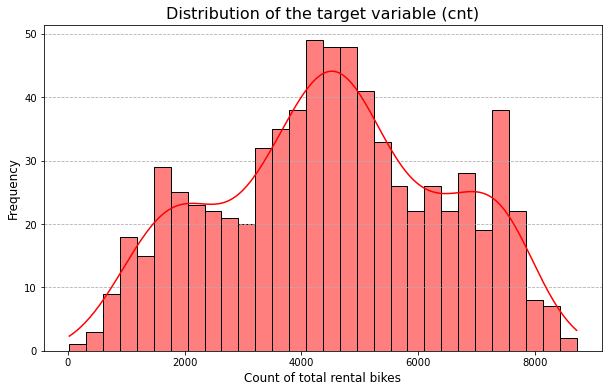

In [25]:
#lets plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribution of the target variable (cnt)', fontsize=16)
plt.xlabel('Count of total rental bikes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

The distribution of the 'cnt' variable appears to be right-skewed, indicating that on most days, the number of bike rentals was on the lower side, with fewer days experiencing very high rentals.

Lets use a heatmap oto find the correlation between the variables and help to find variables which are related to each other

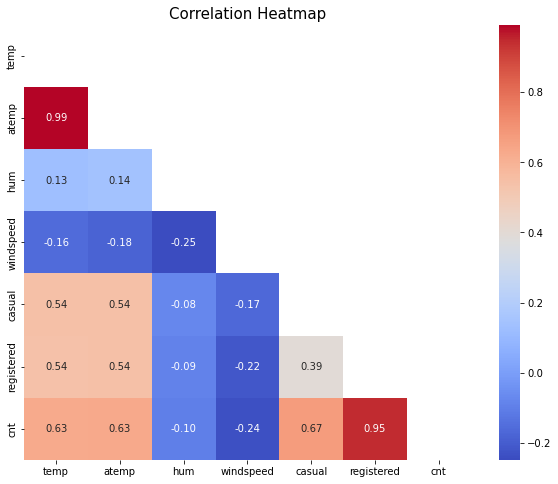

In [26]:
#Lets list the continious variables
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_matrix = df[numerical_cols].corr()

#masking
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap', fontsize=15)
plt.show()


Observations:

temp and atemp are highly related as expected as both are temperature fields.
casual and registered both have a strong positive correlation with the target variable cnt.

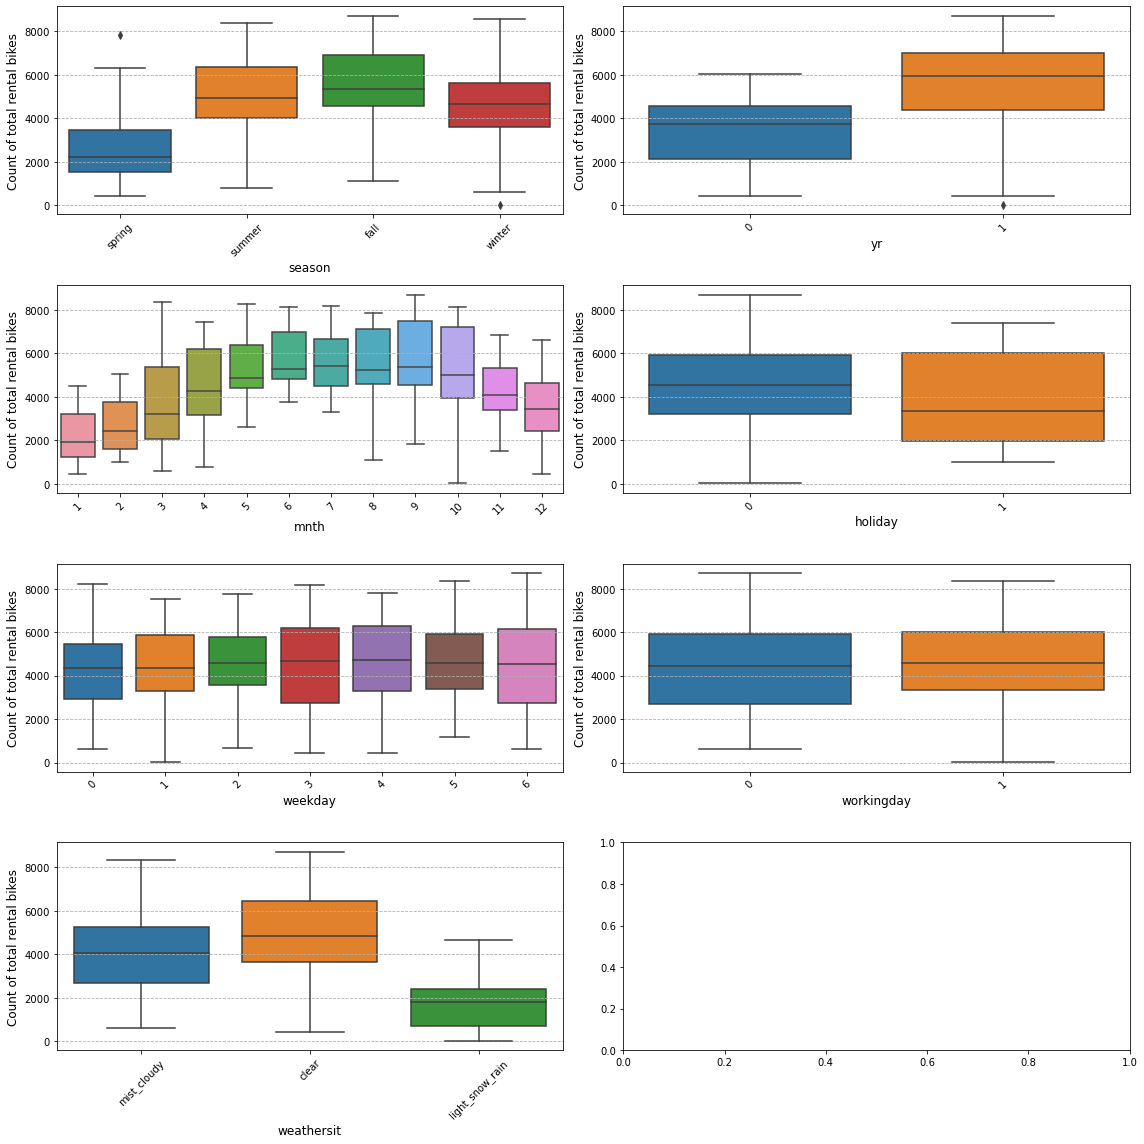

In [27]:
#now lets work on finding the relaltionship woth respect to the other variables, Let's start with the categorical variables. We'll plot boxplots of 'cnt' against 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit'


# List of categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

for i, var in enumerate(categorical_vars):
    row = i // 2 
    col = i % 2  
    ax = axes[row, col] 
    sns.boxplot(x=var, y='cnt', data=df, ax=ax)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Count of total rental bikes', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(axis='y', linestyle='--')
    
plt.tight_layout()
plt.show()

Observations:

Season: There seems to be a trend where the number of bike rentals increases from spring (1), fall (3), then drops in winter (4). This makes sense as the bikers like summer and fall more.

Year: There's an increase in bike rentals from 2018 (0) to 2019 (1), indicating that the bike-sharing service is growing.

Month: The number of bike rentals appears to peak around the middle of the year, which aligns with the summer season.

Holiday: Holidays no one uses the bike rental service

Weekday: This seems to remain the same.

Working Day: There appears to be slightly more bike rentals on working days compared to non-working days.

Weather Situation: The number of bike rentals is highest on clear days (1), decreases as the weather gets misty or cloudy (2), and is lowest on light rain or snow days (3). There are no records for heavy rain or snow days (4).

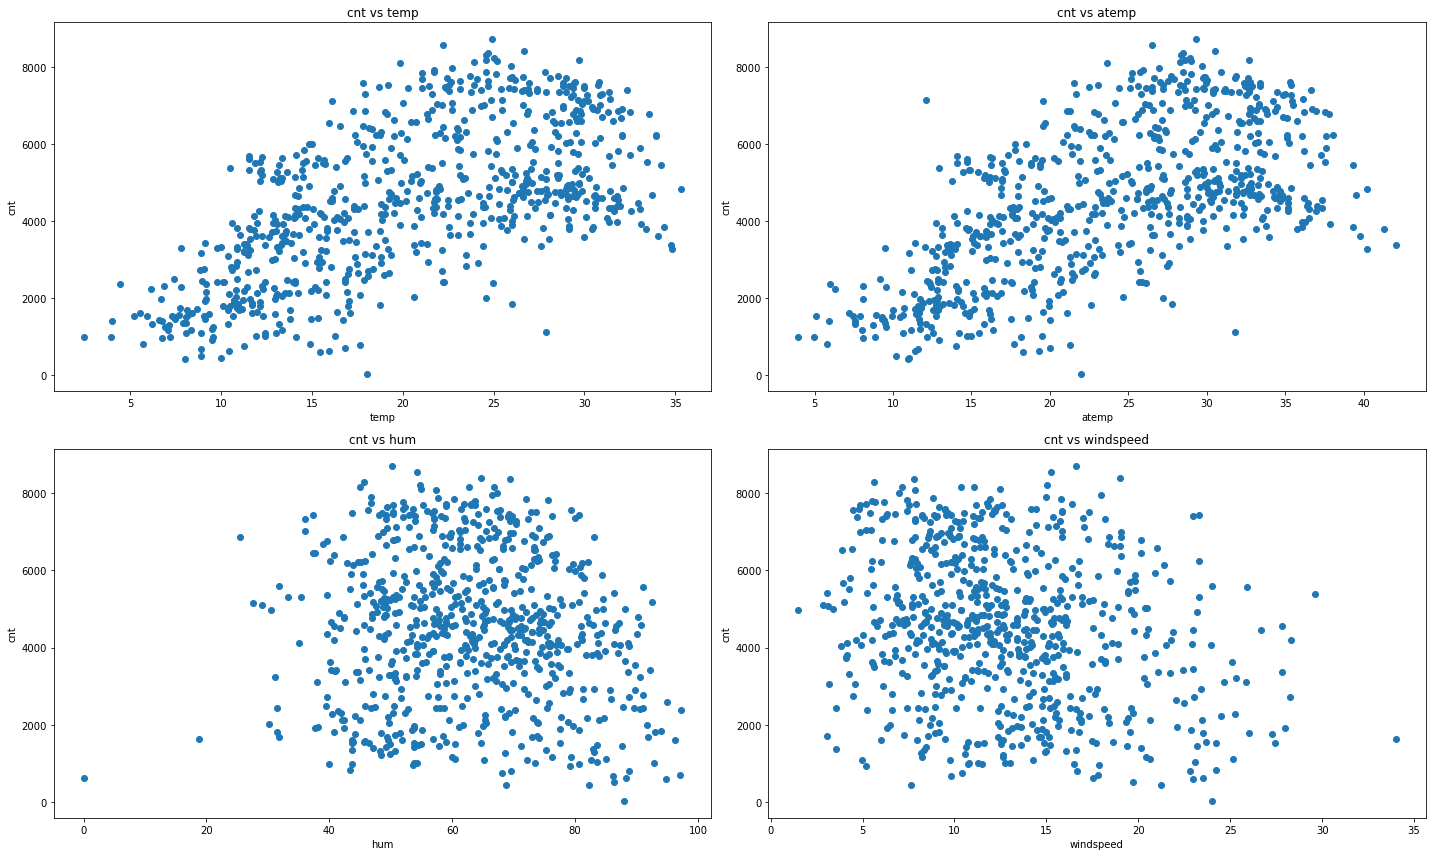

In [13]:
#let us explore the realtionships between 'cnt' and the numerical variabes with the help of a scatter plot against 'temp,'atemp', 'hum', 'windspeed'

# List of numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 12))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[var], df['cnt'])
    plt.title(f'cnt vs {var}')
    plt.xlabel(var)
    plt.ylabel('cnt')

plt.tight_layout()
plt.show()


Observations:
Temperature (temp and atemp): The number of bike rentals seems to increase with temperature

Humidity (hum): The relationship between humidity and bike rentals is not as clear, but there seems to be a slight negative correlation.

Windspeed: fewer rentals on days with very high windspeed. This could be because strong wind can make bikiing difficult.


Let's split the data, with 70% of the data going into the training set and 30% into the test set and drop the columns which are highly correlated.

In [28]:
#selecting features and target
features = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
target = df['cnt']

# One-hot encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((584, 14), (146, 14))

In [29]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating the R-squared score of the model
r2 = r2_score(y_test, y_pred)
r2

0.8520828533826302

The R-squared score on the training set is approximately 0.852.

In [22]:
# Make predictions on the test data
y_pred = lm.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculating the root mean squared error 
rmse = np.sqrt(mse)

test_r2, mse, rmse

(0.8520828533826302, 506297.0172433982, 711.5455131215418)

#Spme of the Observations:

Here are the coefficients for the variables in our model:

Year (yr): The coefficient is 1987, indicating that the number of bike rentals is expected to increase 

Season_Winter: The coefficient is 802.7, indicating that the number of bike rentals is expected to increase by about 802.7 units in winter.

weathersit_light_snow_rain: The coefficient is -2079.97, indicating that the number of bike rentals is expected to decrease by about 2079.97 units on days with light snow or light rain compared to clear days.

season_summer: The coefficient is 245, indicating that the number of bike rentals is expected to increase by about 245 units in summer compared to spring.


Let's answer the company's questions:

Which variables are significant in predicting the demand for shared bikes?
How well those variables describe the bike demands?

Based on our model, all variables included in the model are significant in predicting the demand for shared bikes.

The variables describe the bike demands fairly well, as indicated by the R-squared scores of about 0.85.The compnay may want to ensure they have sufficient bikes available in 2019, during winter, and on working days. 
They may also want to prepare for lower demand on holidays, on misty or cloudy days, and on days with higher wind speed or humidity